<a href="https://colab.research.google.com/github/Shalu-Yadav0811/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [90]:
# Loading the dataset to a pandas DataFrame
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [91]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
# number of rows and columns
wine_dataset.shape

(1599, 12)

In [93]:
# Checking for missing values
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and Visualization

In [94]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


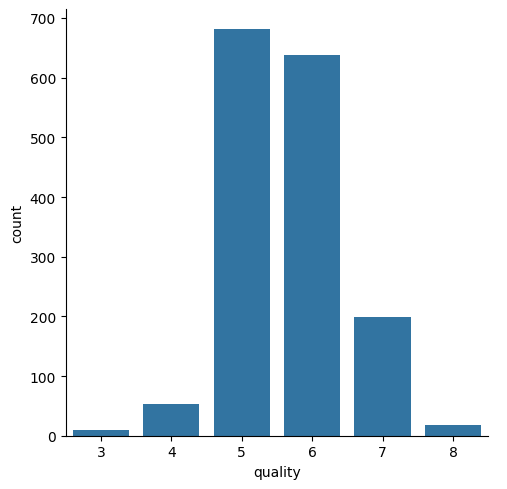

In [95]:
# Number of values for each quality
sns.catplot(x='quality', data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

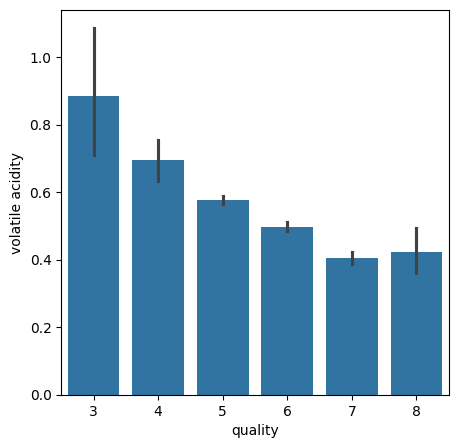

In [96]:
# Volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

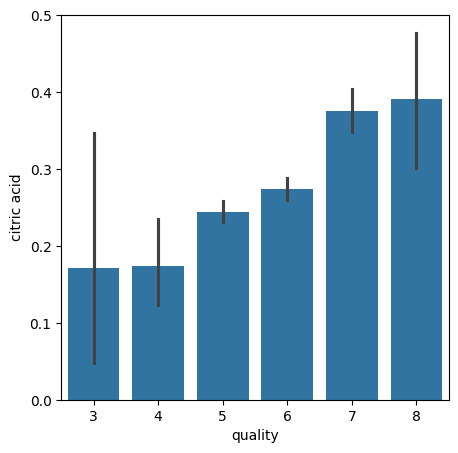

In [97]:
# Citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine_dataset)

<Axes: xlabel='quality', ylabel='residual sugar'>

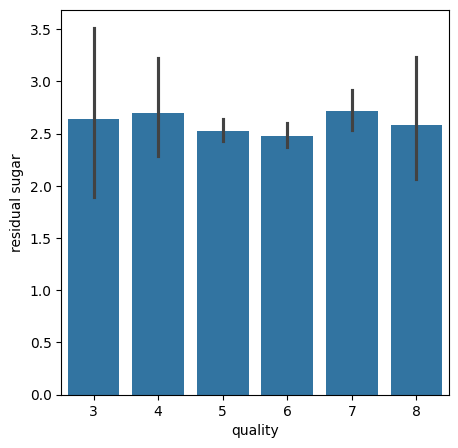

In [98]:
# Residual Sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=wine_dataset)

<Axes: xlabel='quality', ylabel='chlorides'>

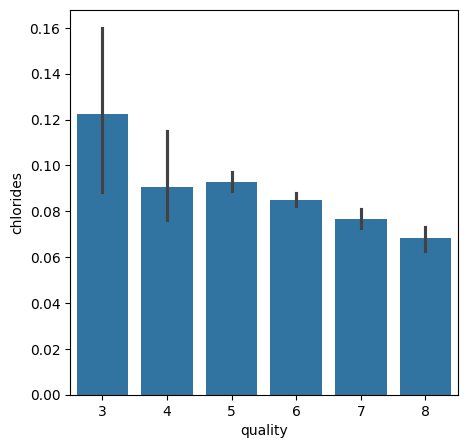

In [99]:
# Chlorides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data=wine_dataset)

<Axes: xlabel='quality', ylabel='density'>

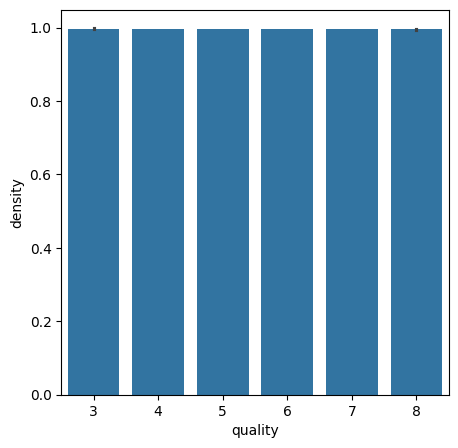

In [100]:
# Density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density', data=wine_dataset)

<Axes: xlabel='quality', ylabel='pH'>

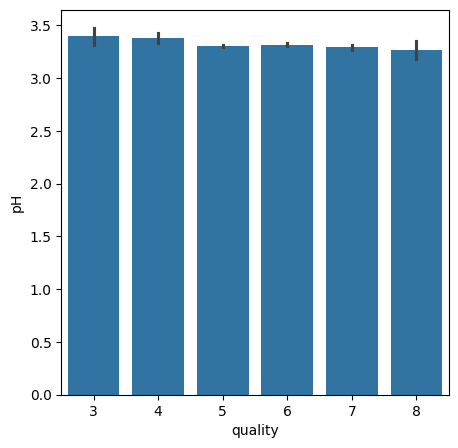

In [101]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH', data=wine_dataset)

<Axes: xlabel='quality', ylabel='sulphates'>

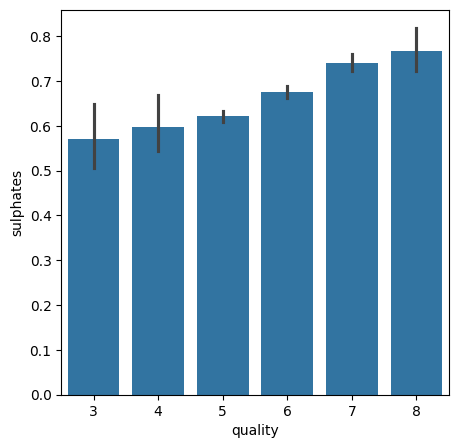

In [102]:
# Sulphates vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates', data=wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

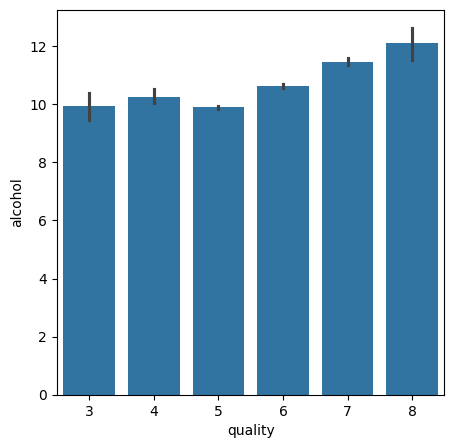

In [103]:
# Alcohol vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol', data=wine_dataset)

Correlation

1. Positive Correlation
2. Negative Correlation

In [104]:
correlation = wine_dataset.corr()

<Axes: >

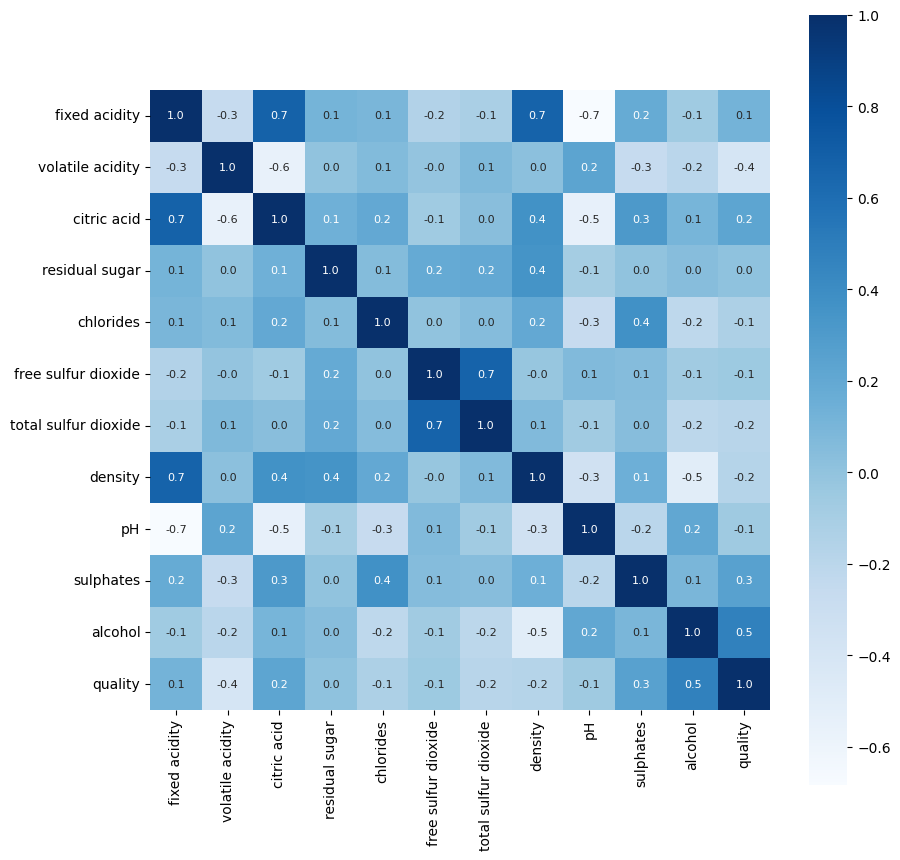

In [105]:
# Constructing a Heap map to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: >

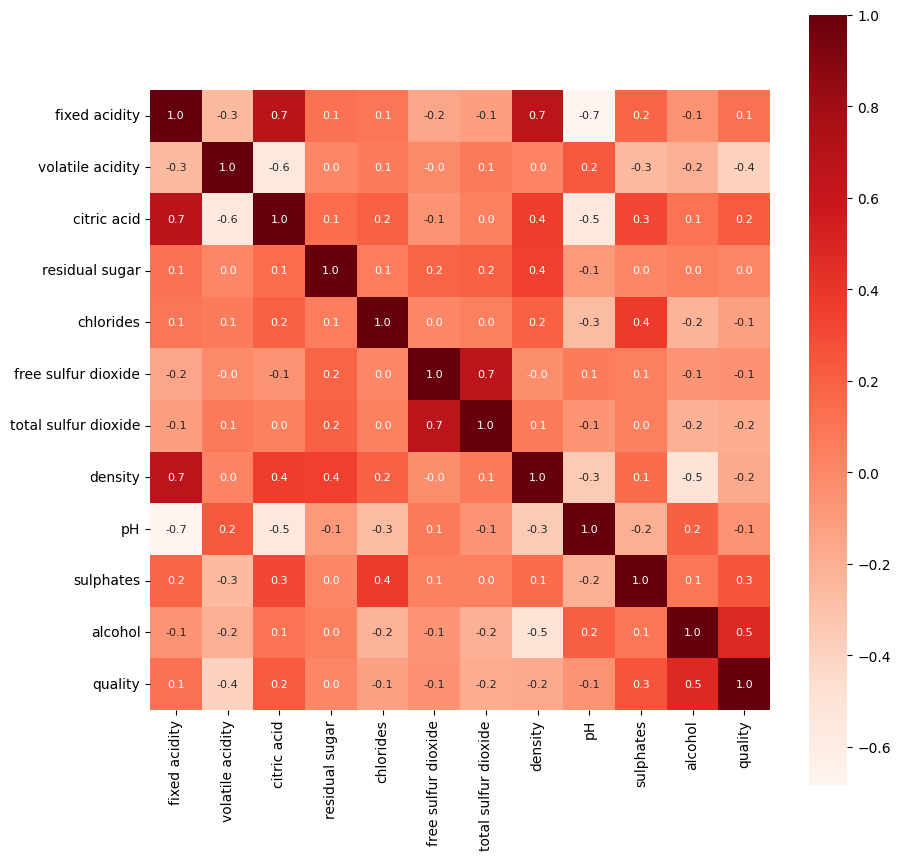

In [106]:
# Constructing a Heap map to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

<Axes: >

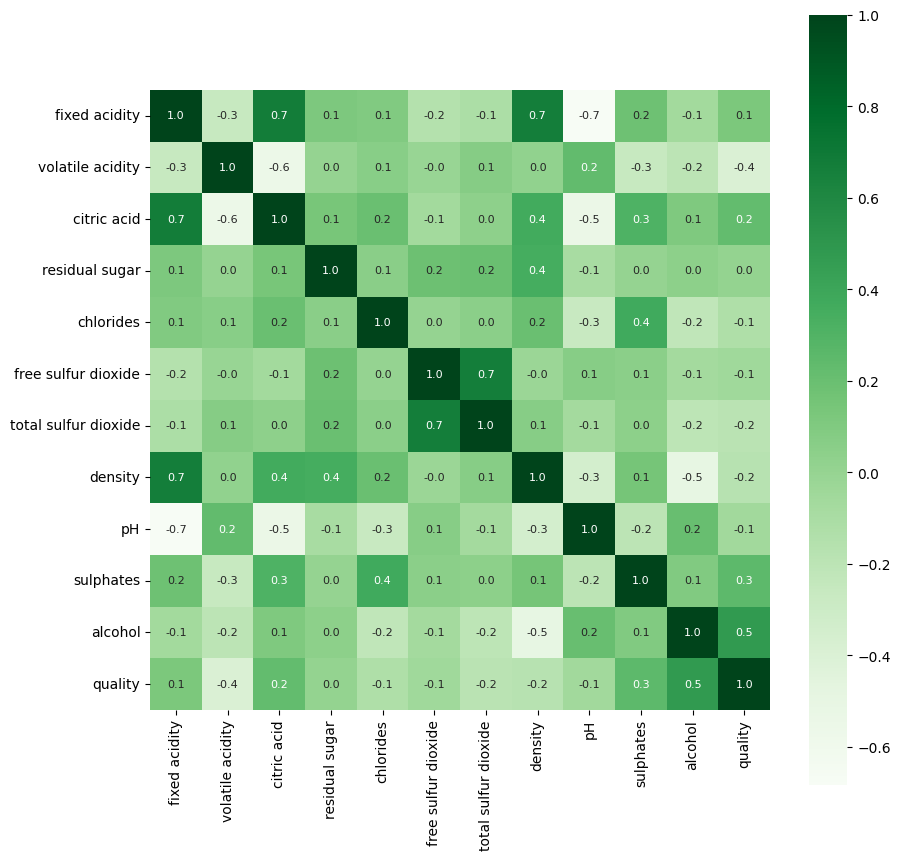

In [107]:
# Constructing a Heap map to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

Data Preprocessing

In [108]:
# Seperate the data and label

In [109]:
X = wine_dataset.drop('quality',axis=1)

In [110]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [111]:
Y = wine_dataset['quality'].apply(lambda y : 1 if y >= 7 else 0)

In [112]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [114]:
print(X.shape,X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [115]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
606             9.4              0.41         0.48             4.6      0.072   
362            11.9              0.58         0.66             2.5      0.072   
533            10.3              0.27         0.24             2.1      0.072   
1397            7.3              0.59         0.26             2.0      0.080   
733             7.0              0.45         0.34             2.7      0.082   
...             ...               ...          ...             ...        ...   
789             8.6              0.63         0.17             2.9      0.099   
256             9.4              0.34         0.37             2.2      0.075   
968             9.0              0.40         0.43             2.4      0.068   
952             8.2              0.31         0.40             2.2      0.058   
1273            7.5              0.58         0.20             2.0      0.073   

      free sulfur dioxide  

In [116]:
print(Y_train)

606     1
362     0
533     0
1397    0
733     0
       ..
789     0
256     0
968     0
952     1
1273    0
Name: quality, Length: 1279, dtype: int64


In [117]:
print(X_test)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
147             7.6             0.490         0.26             1.6      0.236   
937            12.0             0.630         0.50             1.4      0.071   
877             7.7             0.715         0.01             2.1      0.064   
1000            7.5             0.430         0.30             2.2      0.062   
73              8.3             0.675         0.26             2.1      0.084   
...             ...               ...          ...             ...        ...   
841             6.6             0.660         0.00             3.0      0.115   
889            10.7             0.900         0.34             6.6      0.112   
1145            8.2             0.200         0.43             2.5      0.076   
1476            9.9             0.500         0.50            13.8      0.205   
187             7.7             0.705         0.10             2.6      0.084   

      free sulfur dioxide  

In [118]:
print(Y_test)

147     0
937     0
877     0
1000    1
73      0
       ..
841     0
889     0
1145    0
1476    0
187     0
Name: quality, Length: 320, dtype: int64


In [119]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training

Random Forest Classifier

---

Random Forest Algorithm :
1. Single Decision Tree:

- A Decision Tree is a flowchart-like structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents the final prediction.
- It works by recursively splitting the dataset based on feature values to minimize impurity (e.g., Gini Impurity or Entropy in classification, Mean Squared Error in regression).

2. Multiple Decision Trees (Random Forest):

- Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for better accuracy and generalization.
- It differs from training multiple identical decision trees in the following ways:
 - Uses Bootstrapping (Bagging): Each tree is trained on a different subset of the original dataset (random sampling with replacement).
 - Feature Randomness: Instead of considering all features at each split, only a random subset of features is considered, preventing overfitting.
 - Voting/Averaging:
   - Classification: The final prediction is decided by majority voting (most common class).
   - Regression: The final prediction is the average of all tree predictions.

In [120]:
model = RandomForestClassifier()

In [121]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [122]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [123]:
print("Accuracy of the test data is :",test_data_accuracy)

Accuracy of the test data is : 0.940625


Building a Predictive System

In [124]:
input_data = (11.0,0.3,0.58,2.1,0.054000000000000006,7.0,19.0,0.998,3.31,0.88,10.5)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 1:
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

[1]
Good Quality Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [125]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 1:
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

[0]
Bad Quality Wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
